# Exercise 7

In this exercise, you will train regression models for predicting air pollution. 

**1.** Use pandas to load the CSV file into a DataFrame object named ‘data’. Display the first five rows of the data frame.

**Solution:**

In [1]:
import pandas as pd

data = pd.read_csv("PRSA_data.csv")
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


**2.** Observe that the data contains missing values. To address this, remove the rows that contain any missing values. You should also discard the columns named "No", "year", and "cbwd". Display the first 5 rows of the resulting dataframe after removing the columns and missing values.

In [2]:
data = data.drop('No', 1)
data = data.drop('cbwd', 1)
data = data.drop('year', 1)
data = data.dropna()
data.head()

,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
24,1,2,0,129.0,-16,-4.0,1020.0,1.79,0,0
25,1,2,1,148.0,-15,-4.0,1020.0,2.68,0,0
26,1,2,2,159.0,-11,-5.0,1021.0,3.57,0,0
27,1,2,3,181.0,-7,-5.0,1022.0,5.36,1,0
28,1,2,4,138.0,-7,-5.0,1022.0,6.25,2,0


**3.** Our goal is to predict "pm2.5" (target attribute) based on the rest of the columns in the data frame ("month", "day", "hour", DEWP, TEMP, PRES, lws, ls, and lr). To do this, you should first create a series object called Y from the "pm2.5" column. Next, remove the "pm2.5" from the dataframe and assign the remaining columns to a dataframe object called X. Display the first 5 rows of X.

In [3]:
Y = pd.DataFrame(data['pm2.5'])
X = pd.DataFrame(data.drop('pm2.5',1))
X.head()

,month,day,hour,DEWP,TEMP,PRES,Iws,Is,Ir
24,1,2,0,-16,-4.0,1020.0,1.79,0,0
25,1,2,1,-15,-4.0,1020.0,2.68,0,0
26,1,2,2,-11,-5.0,1021.0,3.57,0,0
27,1,2,3,-7,-5.0,1022.0,5.36,1,0
28,1,2,4,-7,-5.0,1022.0,6.25,2,0


**4.** Divide the data into 70% training and 30% test sets using scikit-learn train_test_split. Set the random state to be 1. For more information, you may refer to https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

**Solution:**

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X,Y,test_size =0.3, random_state=1)

**5.** Fit a linear regression model to the training data. Apply the model to predict the stock price in the test data and calculate its root-mean-square error and r-square coefficient. Print the regression coefficients (slope and intercept) of the model. In addition, draw a scatter plot between the true value of the test set and their predicted value.

**Solution:**

Root mean squared error = 78.1049
R-square = 0.2560
Slope Coefficients: [[-1.56802833  0.75050291  1.63264151  4.80497766 -6.6414188  -1.47624944
  -0.25073801 -2.70947104 -7.33484175]]
Intercept: [1660.6910474]


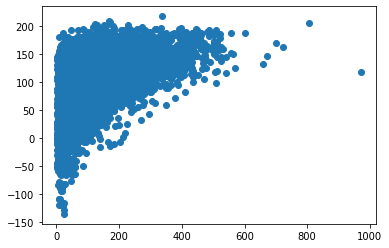

In [5]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(X_train, y_train)

# Apply model to the test set
y_pred_test = regr.predict(X_test)


# Evaluate the results

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("R-square = %.4f" % r2_score(y_test, y_pred_test))
print('Slope Coefficients:', regr.coef_ )
print('Intercept:', regr.intercept_)

plt.scatter(y_test, y_pred_test)